In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

from pyCascade import probePost, physics, utils
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import os
from IPython.core.debugger import set_trace
import pandas as pd

category =  "config2"

############ Universal ################
scratch_home = os.getenv('SCRATCH') #need to set SCRATCH (even if there is no real SCRATCH) to the location where results are written
scratch_dir = f'{scratch_home}/Cascade/city_block_cfd'
home_dir = !pwd
home_dir = home_dir[0]

display(scratch_dir)
display(home_dir)

'/scratch/users/nbachand/Cascade/city_block_cfd'

'/home/users/nbachand/Cascade/city_block_cfd'

In [2]:
hm = 6
window_dim = hm/2/4

velocity_scaling = 1
ventilation_scaling = velocity_scaling/(window_dim**2)

norm_vel = probePost.quick_dict_apply(lambda data_df: data_df*velocity_scaling)
norm_vent = probePost.quick_dict_apply(
    lambda data_df: data_df*velocity_scaling)
abs_values = probePost.quick_dict_apply(lambda df: df.abs())
norm_data = lambda data_df : data_df*ventilation_scaling
flip_data = probePost.quick_dict_apply(lambda data_df: -data_df)


In [3]:
run = 15
qois = ["mass_flux", "comp(u,0)"]

probes_dir = f'{scratch_dir}/CHARLES/{category}/R{run}/probes/probesOut'

probes = probePost.Probes(probes_dir, probe_type = "FLUX_PROBES", flux_quants = qois)


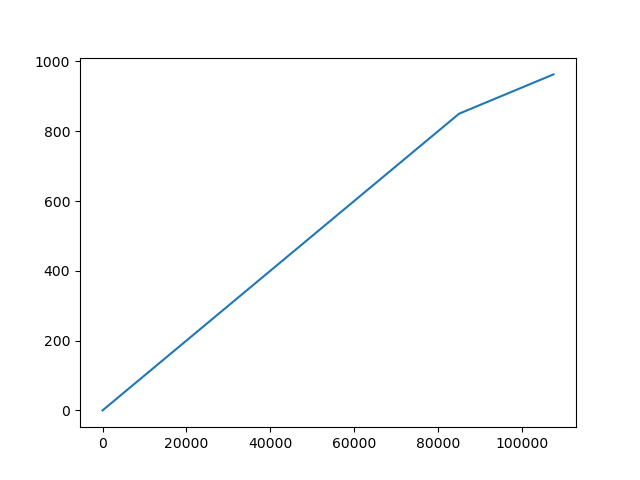

In [4]:
plt.figure()
plt.plot(probes.probe_steps, probes.probe_times)
plt.show()

In [5]:
start = 1
stop = -2
by = 1

processing data took 1 seconds


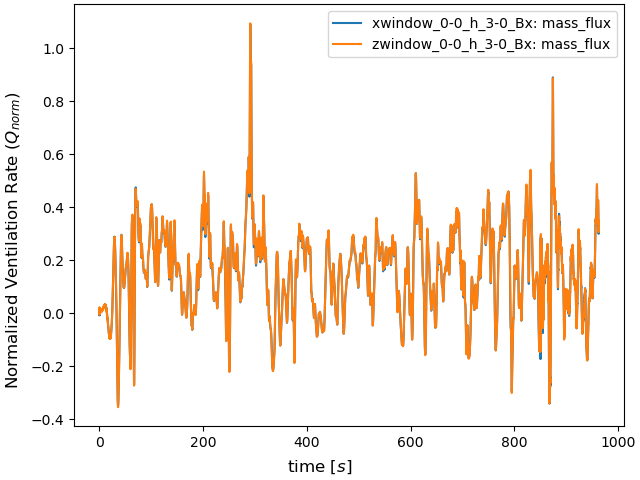

In [6]:
norm_norm = probePost.quick_apply(
    lambda df: probePost.mul_names(df, ['xwindow_2-0', 'xwindow_2-1'], -1)
)

(fig, ax) = probes.time_plots(
    names = ["xwindow_0-0_h_3-0_Bx", "zwindow_0-0_h_3-0_Bx"], #[name for name in  probes.probe_names if "xwindow_" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = [qois[0]],
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : probes.probe_times,
        },
    processing = [norm_vent, norm_norm],
    parrallel=True
    )

processing data took 0 seconds


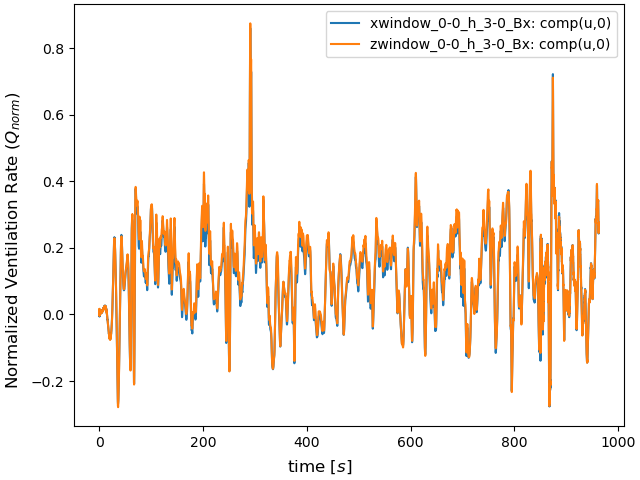

In [7]:
norm_norm = probePost.quick_apply(
    lambda df: probePost.mul_names(df, ['xwindow_2-0', 'xwindow_2-1'], -1)
)

(fig, ax) = probes.time_plots(
    names = ["xwindow_0-0_h_3-0_Bx", "zwindow_0-0_h_3-0_Bx"], #[name for name in  probes.probe_names if "xwindow_" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = [qois[1]],
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : probes.probe_times,
        },
    processing = [norm_vent, norm_norm],
    parrallel=True
    )

processing data took 0 seconds


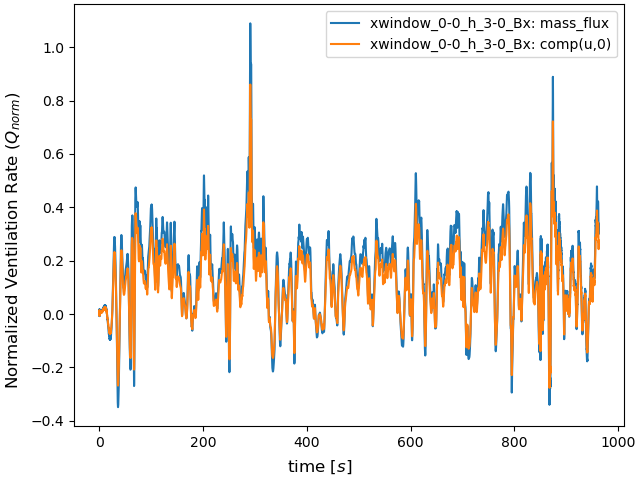

In [8]:
norm_norm = probePost.quick_apply(
    lambda df: probePost.mul_names(df, ['xwindow_2-0', 'xwindow_2-1'], -1)
)

(fig, ax) = probes.time_plots(
    names = ["xwindow_0-0_h_3-0_Bx"], #[name for name in  probes.probe_names if "xwindow_" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = qois,
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : probes.probe_times,
        },
    processing = [norm_vent, norm_norm],
    parrallel=True
    )

(0.0, 2.45)

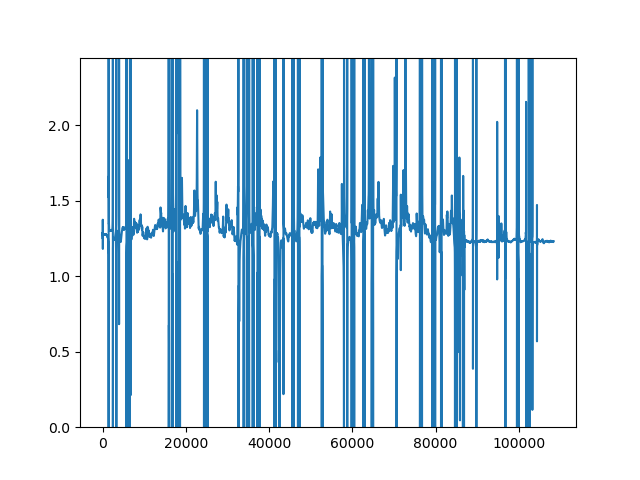

In [9]:
plt.figure()
foo_mass = probes.data[("xwindow_0-0_h_3-0_Bx", qois[0])].compute()
foo_u = probes.data[("xwindow_0-0_h_3-0_Bx", qois[1])].compute()
foo_area = probes.areas["xwindow_0-0_h_3-0_Bx"]
plt.plot(foo_mass.values/foo_u.values)
plt.ylim(0,1.225*2)


0.5625

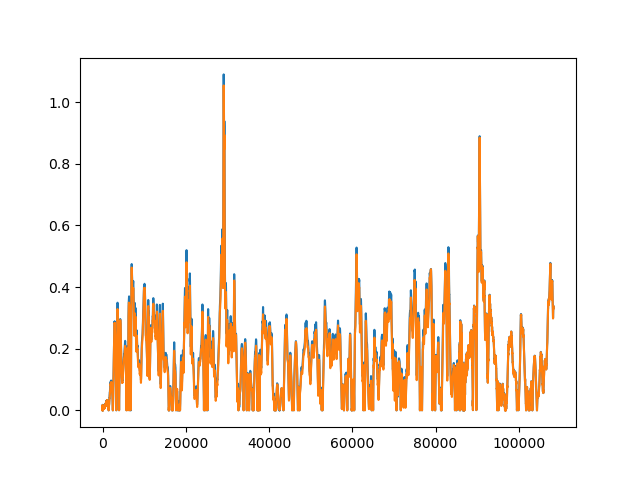

In [10]:
plt.figure()
plt.plot(abs(foo_mass.values))
plt.plot(abs(foo_u.values*1.225))
display(foo_area)
plt.show()

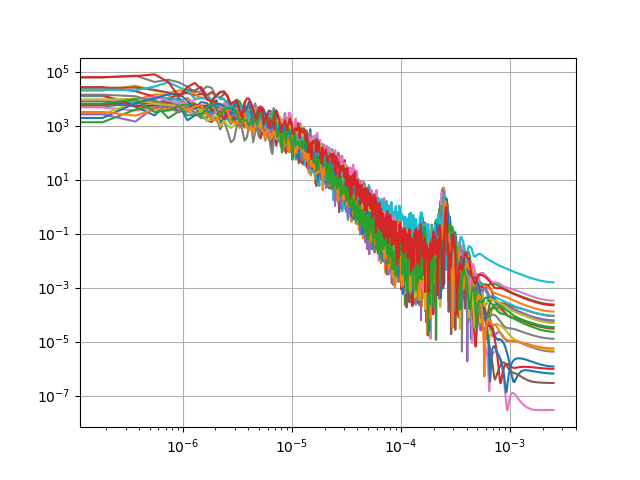

In [11]:
E_all = []
plt.figure()
for name in probes.probe_names:
    if "xwindow_0-0" in name:
        mass_flow = probes.data[(name, qois[0])].compute()
        N = len(mass_flow)
#         T = probes.dt
        
#         yf = sp.fft.fft(mass_flow)
#         xf = sp.fft.fftfreq(N, T)[:N//2]
        
#         plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
        f, E = sp.signal.welch(mass_flow.values, fs = probes.dt, axis = 0, nperseg = N//4, scaling = 'density', detrend = 'constant') 
        plt.loglog(f, E)
        E_all.append(E)
        
plt.grid()

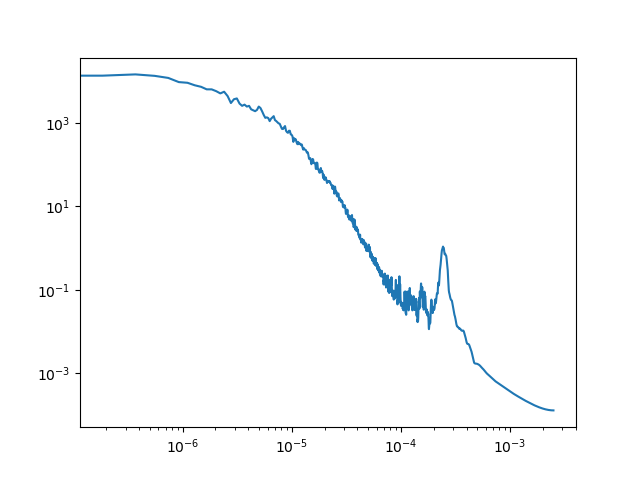

In [12]:
plt.figure()
E_avg = np.mean(np.array(E_all), axis = 0)
plt.loglog(f, E_avg)
plt.show()

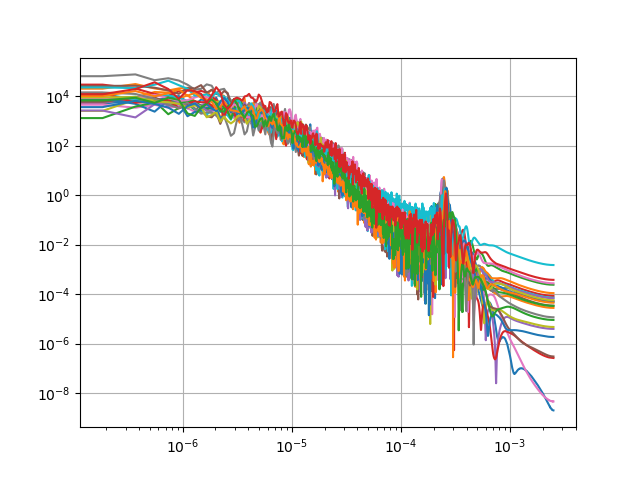

In [13]:
E_all = []
plt.figure()
for name in probes.probe_names:
    if "zwindow_0-0" in name:
        N = len(mass_flow)
        mass_flow = probes.data[(name, qois[0])].compute()
        f, E = sp.signal.welch(mass_flow.values, fs = probes.dt, axis = 0, nperseg = N//4, scaling = 'density', detrend = 'constant') 
        plt.loglog(f, E)
        
        E_all.append(E)
plt.grid()

plt.show()

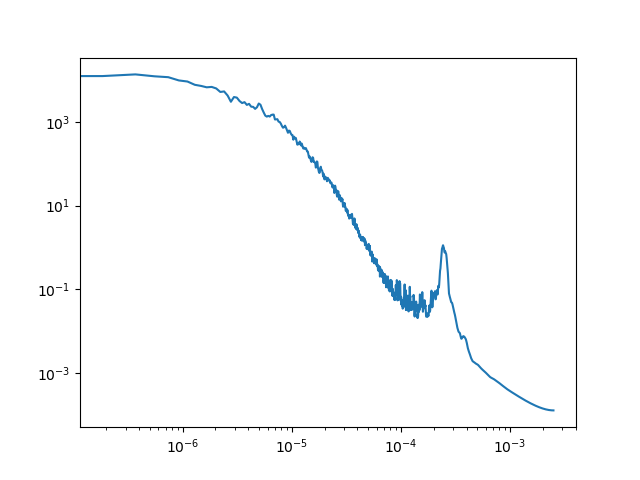

In [14]:
plt.figure()
E_avg = np.mean(np.array(E_all), axis = 0)
plt.loglog(f, E_avg)
plt.show()

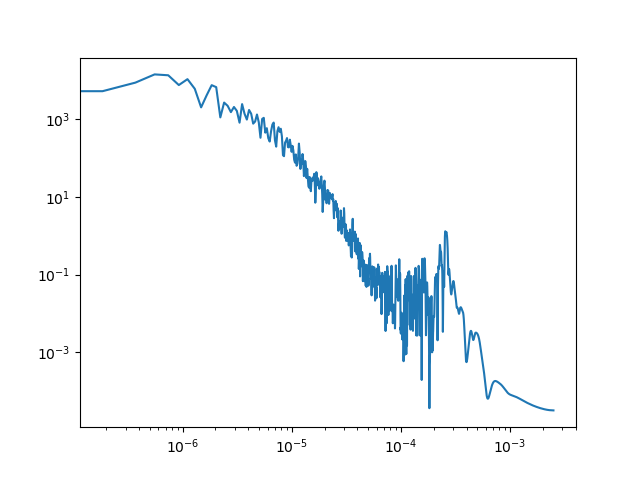

In [15]:
plt.figure()
f, E = sp.signal.welch(foo_mass.values, fs = probes.dt, axis = 0, nperseg = N//4, scaling = 'density', detrend = 'constant') 
plt.loglog(f, E)

## X Flow


processing data took 21 seconds
processing data took 11 seconds
processing data took 11 seconds
processing data took 10 seconds


,"comp(u,0)",mass_flux
xwindow_0-0_h_3-0,"comp(u,0) -0.003563 dtype: float64",mass_flux 0.016014 dtype: float64
xwindow_0-0_h_3-0_Bx,"comp(u,0) 0.120357 dtype: float64",mass_flux 0.157581 dtype: float64
xwindow_0-0_h_3-0_Bxz,"comp(u,0) 0.063933 dtype: float64",mass_flux 0.0772 dtype: float64
xwindow_0-0_h_3-0_Bz,"comp(u,0) 0.437501 dtype: float64",mass_flux 0.557545 dtype: float64
xwindow_0-0_h_3-1,"comp(u,0) 0.021881 dtype: float64",mass_flux 0.04812 dtype: float64
xwindow_0-0_h_3-1_Bx,"comp(u,0) 0.05357 dtype: float64",mass_flux 0.072521 dtype: float64
xwindow_0-0_h_3-1_Bxz,"comp(u,0) 0.065815 dtype: float64",mass_flux 0.07641 dtype: float64
xwindow_0-0_h_3-1_Bz,"comp(u,0) 0.290487 dtype: float64",mass_flux 0.380333 dtype: float64
xwindow_0-0_h_3-2,"comp(u,0) -0.008095 dtype: float64",mass_flux 0.004462 dtype: float64
xwindow_0-0_h_3-2_Bx,"comp(u,0) 0.106895 dtype: float64",mass_flux 0.147595 dtype: float64


,"comp(u,0)",mass_flux
xwindow_0-0_h_3-0,"comp(u,0) 0.153564 dtype: float64",mass_flux 0.200091 dtype: float64
xwindow_0-0_h_3-0_Bx,"comp(u,0) 0.127466 dtype: float64",mass_flux 0.162541 dtype: float64
xwindow_0-0_h_3-0_Bxz,"comp(u,0) 0.133534 dtype: float64",mass_flux 0.167719 dtype: float64
xwindow_0-0_h_3-0_Bz,"comp(u,0) 0.218561 dtype: float64",mass_flux 0.275393 dtype: float64
xwindow_0-0_h_3-1,"comp(u,0) 0.148105 dtype: float64",mass_flux 0.194933 dtype: float64
xwindow_0-0_h_3-1_Bx,"comp(u,0) 0.110698 dtype: float64",mass_flux 0.14243 dtype: float64
xwindow_0-0_h_3-1_Bxz,"comp(u,0) 0.115966 dtype: float64",mass_flux 0.145748 dtype: float64
xwindow_0-0_h_3-1_Bz,"comp(u,0) 0.266564 dtype: float64",mass_flux 0.345035 dtype: float64
xwindow_0-0_h_3-2,"comp(u,0) 0.120099 dtype: float64",mass_flux 0.154707 dtype: float64
xwindow_0-0_h_3-2_Bx,"comp(u,0) 0.118714 dtype: float64",mass_flux 0.152759 dtype: float64


,"comp(u,0)",mass_flux
xwindow_0-0_h_3-0,"comp(u,0) 0.117571 dtype: float64",mass_flux 0.156148 dtype: float64
xwindow_0-0_h_3-0_Bx,"comp(u,0) 0.142372 dtype: float64",mass_flux 0.184908 dtype: float64
xwindow_0-0_h_3-0_Bxz,"comp(u,0) 0.120191 dtype: float64",mass_flux 0.150014 dtype: float64
xwindow_0-0_h_3-0_Bz,"comp(u,0) 0.445218 dtype: float64",mass_flux 0.567464 dtype: float64
xwindow_0-0_h_3-1,"comp(u,0) 0.116883 dtype: float64",mass_flux 0.158823 dtype: float64
xwindow_0-0_h_3-1_Bx,"comp(u,0) 0.09633 dtype: float64",mass_flux 0.126389 dtype: float64
xwindow_0-0_h_3-1_Bxz,"comp(u,0) 0.107839 dtype: float64",mass_flux 0.132847 dtype: float64
xwindow_0-0_h_3-1_Bz,"comp(u,0) 0.327496 dtype: float64",mass_flux 0.42704 dtype: float64
xwindow_0-0_h_3-2,"comp(u,0) 0.096475 dtype: float64",mass_flux 0.124015 dtype: float64
xwindow_0-0_h_3-2_Bx,"comp(u,0) 0.133516 dtype: float64",mass_flux 0.179542 dtype: float64


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  self.figure.savefig(buf, format='png', dpi='figure')


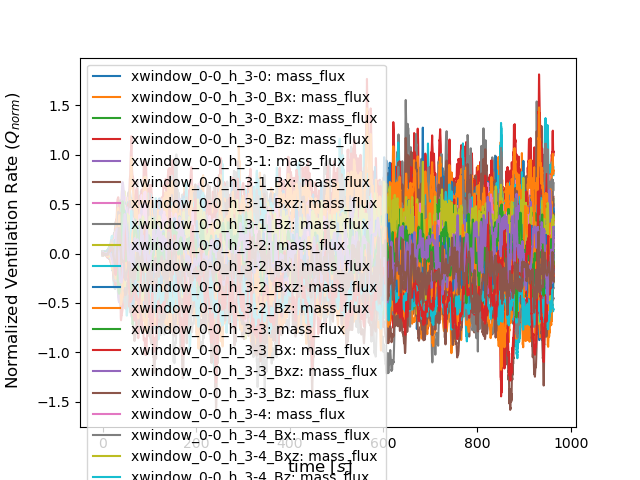

In [16]:
norm_norm = probePost.quick_apply(
    lambda df: probePost.mul_names(df, ['xwindow_2-0', 'xwindow_2-1'], -1)
)

(fig, ax) = probes.time_plots(
    names = [name for name in  probes.probe_names if "xwindow_" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = qois,
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : probes.probe_times,
        },
    processing = [norm_vent, norm_norm],
    parrallel=True
    )

## mean statistics
x_mean = probes.statistics(
    names = [name for name in  probes.probe_names if "xwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = qois,
    processing = [norm_vent, probePost.time_average, norm_norm],
    parrallel=False
    )

## rms statistics
x_rms = probes.statistics(
    names = [name for name in  probes.probe_names if "xwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = qois,
    processing = [norm_vent, probePost.time_rms],
    parrallel=False
    )

## Net flow
x_net = probes.statistics(
    names = [name for name in  probes.probe_names if "xwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = qois,
    processing = [norm_vent, abs_values, probePost.time_average],
    parrallel=False
    )


display(x_mean)
display(x_rms)
display(x_net)

In [17]:
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/xwindows')

x_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xmean.csv')
x_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xrms.csv')
x_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xnet.csv')

/tmp/ipykernel_28183/2225782678.py:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/xwindows')
/tmp/ipykernel_28183/2225782678.py:1: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/xwindows')


## Z Flow


In [18]:
norm_norm = probePost.quick_apply(
    lambda df: probePost.mul_names(df, ['zwindow_0-1', 'zwindow_1-1', 'zwindow_2-1'], -1)
)

(fig, ax) = probes.time_plots(
    names = [name for name in  probes.probe_names if "zwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : probes.probe_times,
        },
    processing = [norm_vent, probePost.linear_quadrature],
    parrallel=True
    )

## mean statistics
z_mean = ventilation_scaling * probes.statistics(
    names = [name for name in  probes.probe_names if "zwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_average, norm_norm],
    parrallel=False
    )

## rms statistics
z_rms = probes.statistics(
    names = [name for name in  probes.probe_names if "zwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_rms],
    parrallel=False
    )

## Net flow
z_net = probes.statistics(
    names = [name for name in  probes.probe_names if "zwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    processing = [norm_vent, probePost.linear_quadrature, abs_values, probePost.time_average],
    parrallel=False
    )

display(z_mean)
display(z_rms)
display(z_net)

KeyError: ('zwindow_0-0_h_3-0', 'comp(u,2)')

In [ ]:
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/zwindows')

z_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/zmean.csv')
z_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/zrms.csv')
z_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/znet.csv')

## Y Flow


In [ ]:
(fig, ax) = probes.time_plots(
    names = [name for name in  probes.probe_names if "skylight_" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : probes.probe_times,
        },
    processing = [norm_vent, probePost.linear_quadrature],
    parrallel=True
    )

## mean statistics
y_mean = ventilation_scaling * probes.statistics(
    names = [name for name in  probes.probe_names if "skylight_" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_average],
    parrallel=False
    )

## rms statistics
y_rms = probes.statistics(
    names = [name for name in  probes.probe_names if "skylight_" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_rms],
    parrallel=False
    )

## Net flow
y_net = probes.statistics(
    names = [name for name in  probes.probe_names if "skylight_" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    processing = [norm_vent, probePost.linear_quadrature, abs_values, probePost.time_average],
    parrallel=False
    )

display(y_mean)
display(y_rms)
display(y_net)

In [ ]:
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/ywindows')

y_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/ymean.csv')
y_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/yrms.csv')
y_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/ynet.csv')